In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from pprint import pprint
import json
import scipy.stats as sts

In [13]:
# Enter manually. Very tedious
bonds = {'Sean-Connery':{'bd':1930,'dates':[1962,1963,1964,1965,1967,1971]},
         'George-Lazenby':{'bd':1939,'dates':[1969]},
         'Roger-Moore':{'bd':1927,'dates':[1973,1974,1977,1979,1981,1983,1985]},
         'Timothy-Dalton':{'bd':1946,'dates':[1987,1989]},
         'Pierce Brosnan':{'bd':1953,'dates':[1995,1997,1999,2002]},
         'Daniel Craig':{'bd':1968,'dates':[2006,2008,2012,2015]}
        }

bond_girls = {'Ursula-Andress': [1936, 1962], 'Zena-Marshall': [1926,1962], 
              'Eunice-Gayson': [1928,1963], 'Daniela-Bianchi': [1942,1963], 
              'Martine-Beswick': [1941,1963], 'Aliza-Gur': [1940,1963], 
              'Honor-Blackman': [1925, 1964], 'Shirley-Eaton': [1937,1964], 
              'Tania-Mallet': [1941,1964], 'Nadja-Regin': [1931,1964], 
              'Margaret-Nolan': [1943,1964], 'Claudine-Auger': [1941, 1965], 
              'Martine-Beswick': [1941,1965], 'Luciana-Paluzzi': [1937, 1965], 
              'Molly-Peters':[1942,1965], 'Maryse-Guy-Mitsouko': [1943,1965], 
              'Mie-Hama': [1943,1967], 'Akiko-Wakabayashi': [1939,1967], 
              'Tsai-Chin': [1936,1967], 'Karin-Dor': [1938,1967], 
              'Diana-Rigg': [1938,1969], 'Angela-Scoular': [1945,1969], 
              'Catherine-Schell': [1944,1969], 'Jill-St-John': [1940,1971], 
              'Lana-Wood': [1946,1971], 
              'Trina-Parks': [1947,1971], 'Denise-Perrier': [1935,1971], 
              'Jane-Seymour': [1951,1973], 'Gloria-Hendry': [1949,1973], 
              'Madeline-Smith': [1949,1973], 'Britt-Ekland': [1942,1974], 
              'Maud-Adams': [1945,1974], 'Carmen-du-Sautoy': [1950,1974], 
              'Barbara-Bach': [1947,1977], 
              'Caroline-Munro': [1949,1977], 
              'Olga-Bisera': [1944,1977], 'Lois-Chiles': [1947,1979], 
              'Corinne-Cléry': [1950,1979], 'Emily-Bolton': [1951,1979], 
              'Carole-Bouquet': [1957,1981], 
              'Lynn-Holly-Johnson': [1958,1981], 'Cassandra-Harris': [1948,1981], 
              'Maud-Adams': [1945,1983], 'Kristina-Wayborn': [1950,1983], 
              'Tanya-Roberts': [1955,1985], 
              'Grace-Jones': [1948,1985], 
              'Fiona-Fullerton': [1956,1985], "Maryam-d'Abo": [1960,1987], 
              'Carey-Lowell': [1961,1989], 
              'Talisa-Soto': [1967,1989], 'Izabella-Scorupco': [1970,1995], 
              'Famke-Janssen': [1964,1995], 'Serena-Gordon': [1963,1995], 
              'Michelle-Yeoh': [1962,1997], 'Teri-Hatcher': [1964,1997], 
              'Cecilie-Thomsen': [1974,1997], 'Denise-Richards': [1971,1999], 
              'Sophie-Marceau': [1966,1999], 'Serena-Scott Thomas': [1961,1999], 
              'Halle-Berry': [1966,2002], 'Rosamund-Pike': [1979,2002], 
              'Rachel-Grant': [1977,2002], 'Eva-Green': [1980, 2006], 
              'Catherina-Murino': [1977,2006], 'Olga-Kurylenko': [1979,2008], 
              'Gemma-Arterton': [1986,2008], 'Bérénice-Marlohe': [1979,2012], 
              'Tonia-Sotiropoulou': [1987,2012], 'Monica-Bellucci': [1964, 2015], 
              'Léa-Seydoux': [1985, 2015]}

In [17]:
ages = []
years = []

for x in bond_girls:
    ages.append(bond_girls[x][1]-bond_girls[x][0])
    years.append(bond_girls[x][1])

bond_ages = []
bond_years = []

for james in bonds:
    bonds[james]['age'] = []
    for date in bonds[james]['dates']:
        age = date-bonds[james]['bd']
        bonds[james]['age'].append(age)
        
print(bonds)

{'Sean-Connery': {'bd': 1930, 'dates': [1962, 1963, 1964, 1965, 1967, 1971], 'age': [32, 33, 34, 35, 37, 41]}, 'George-Lazenby': {'bd': 1939, 'dates': [1969], 'age': [30]}, 'Roger-Moore': {'bd': 1927, 'dates': [1973, 1974, 1977, 1979, 1981, 1983, 1985], 'age': [46, 47, 50, 52, 54, 56, 58]}, 'Timothy-Dalton': {'bd': 1946, 'dates': [1987, 1989], 'age': [41, 43]}, 'Pierce Brosnan': {'bd': 1953, 'dates': [1995, 1997, 1999, 2002], 'age': [42, 44, 46, 49]}, 'Daniel Craig': {'bd': 1968, 'dates': [2006, 2008, 2012, 2015], 'age': [38, 40, 44, 47]}}


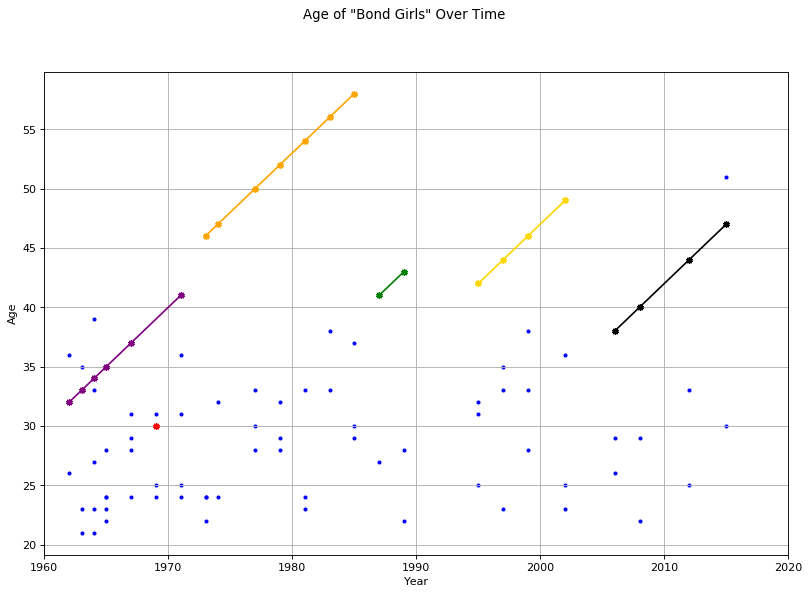

In [65]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(years,ages,c='blue',s=7)
plt.suptitle('Age of "Bond Girls" Over Time')
plt.xlabel('Year')
plt.ylabel('Age')
plt.grid(True)
plt.xlim(1960,2020)

colors = ['purple','red','orange','green','gold','black','brown']

i = 0
for james in bonds:
    plt.plot(bonds[james]['dates'],bonds[james]['age'],c=colors[i], marker=(10,2,0))
    i+=1